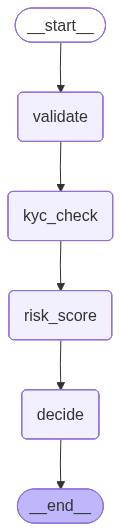

Final decision: APPROVE ✅
Risk score: 20
KYC: PASS


In [3]:
from langgraph.graph import StateGraph
from typing import TypedDict, Literal
from IPython.display import Image, display

# 1) State = the data that flows through the graph
class LoanState(TypedDict):
    name: str
    income: int
    kyc: Literal["PENDING", "PASS", "FAIL"]
    risk_score: int
    decision: str

# 2) Nodes = steps in the enterprise workflow
def validate(state: LoanState) -> LoanState:
    # simple validation
    if state["income"] <= 0:
        state["decision"] = "REJECT (Invalid income)"
    return state

def kyc_check(state: LoanState) -> LoanState:
    # pretend KYC logic
    state["kyc"] = "PASS" if state["name"].strip() else "FAIL"
    return state

def risk_score(state: LoanState) -> LoanState:
    # pretend risk scoring
    state["risk_score"] = 20 if state["income"] >= 50000 else 80
    return state

def decide(state: LoanState) -> LoanState:
    if state.get("decision"):  # already rejected in validation
        return state
    if state["kyc"] == "FAIL":
        state["decision"] = "REJECT (KYC failed)"
    elif state["risk_score"] < 50:
        state["decision"] = "APPROVE ✅"
    else:
        state["decision"] = "MANUAL REVIEW 🕵️"
    return state

# 3) Build the graph
builder = StateGraph(LoanState)

builder.add_node("validate", validate)
builder.add_node("kyc_check", kyc_check)
builder.add_node("risk_score", risk_score)
builder.add_node("decide", decide)

builder.set_entry_point("validate")
builder.add_edge("validate", "kyc_check")
builder.add_edge("kyc_check", "risk_score")
builder.add_edge("risk_score", "decide")
builder.set_finish_point("decide")

graph = builder.compile()

# 4) Run it
initial_state: LoanState = {
    "name": "Madhu",
    "income": 65000,
    "kyc": "PENDING",
    "risk_score": 0,
    "decision": ""
}

result = graph.invoke(initial_state)
display(Image(graph.get_graph().draw_mermaid_png()))
print("Final decision:", result["decision"])
print("Risk score:", result["risk_score"])
print("KYC:", result["kyc"])
